# Image Retrieval
Progetto dalle immagini di pokemon a riconoscimento di animali

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import mobilenet_v2
keras.__version__

'2.4.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import zipfile, os
# this would take very long !!!
base_dir = '/content/drive/MyDrive/Magistrale/II anno/Image signal/DSIM_project/image retrieval'
zip = zipfile.ZipFile(f'{base_dir}/AwA2-data.zip')
zip.extractall()
zip.close()

### Import rete 

In [8]:
# tagliamo la rete al penultimo livello
net = mobilenet_v2.MobileNetV2(include_top=False, weights = 'imagenet', 
                               pooling = 'max', input_shape=(224, 224, 3))

9412608/9406464 [==============================] - 0s 0us/step


### Funzioni per caricare il dataset di immagini di base

In [63]:
# Limit number of loaded images
classes = 25 # prime 25 classi
maximg_class = 50 # 30 img per ogni classe
#maximages = 500

# Dummy feature - esempio giocattolo
def identity(image):
    return kimage.img_to_array(img).flatten()

# Data loader
def load_data(base_path, feature_extractor=identity):
    paths = []
    features = []

    for fold_n, fold in enumerate(sorted(os.listdir(base_path))):
      cur_fold = base_path + fold + '/'
      for file_n, f in enumerate(sorted(os.listdir(cur_fold))):
        if f.endswith('.jpg'):
          # Save file path
          cur_path = cur_fold + f
          paths.append(cur_path)
          
          # Load file and extract features
          image = kimage.load_img(cur_path, target_size=(224, 224))
          cur_features = feature_extractor(image)
          features.append(cur_features)
          
        if (file_n > maximg_class) :
          break
          
      print(f"{fold} DONE")
      if fold_n > classes:
        break

    features = np.array(features)
    return features, paths

In [18]:
def neural_features(img):
    x = kimage.img_to_array(img) # to numpy
    x = mobilenet_v2.preprocess_input(x) # preprocess for network
    x = np.expand_dims(x, axis=0) # necessario per la rete
    features = net.predict(x).flatten()
    return features

In [64]:
# carico img di base + paths
jpg_path = f"/content/Animals_with_Attributes2/JPEGImages/"
X_train, paths = load_data(jpg_path, feature_extractor=neural_features)
X_train.shape

antelope DONE
bat DONE
beaver DONE
blue+whale DONE
bobcat DONE
buffalo DONE
chihuahua DONE
chimpanzee DONE
collie DONE
cow DONE
dalmatian DONE
deer DONE
dolphin DONE
elephant DONE
fox DONE
german+shepherd DONE
giant+panda DONE
giraffe DONE
gorilla DONE
grizzly+bear DONE
hamster DONE
hippopotamus DONE
horse DONE
humpback+whale DONE
killer+whale DONE
leopard DONE
lion DONE


(1404, 1280)

Usiamo un KDTree per suddividere lo spazio di ricerca (**ALTRI????**)

In [72]:
from sklearn.neighbors import KDTree
tree = KDTree(X_train)

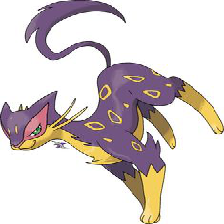

In [75]:
# carico immagine di query + estraggo le sue features
query_image = kimage.load_img(f'{base_dir}/images_test/leopard_liepard.jpg', target_size=(224, 224))
query_features = neural_features(query_image)
query_features = np.expand_dims(query_features, axis = 0)
#plot image
query_image

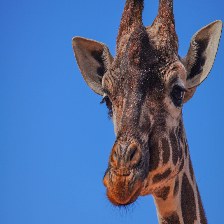

In [76]:
# ricerca nello spazio 
dist, ind = tree.query(query_features, k=1)
# dist > distanza rispetto l'immagine di query
# ind > indice dell'immagine trovata
kimage.load_img(paths[ind[0][0]], target_size=(224,224))